# Pandas et l'analyse de données (tabulaires)

User guide : https://pandas.pydata.org/docs/user_guide/10min.html  
Cheat Sheet : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## 1. Charger des données

In [8]:
# charger les bibliothèques requises
import pandas as pd


In [9]:
# Charger des données locales
df = pd.read_csv("../data/css_openalex_26022026.csv")

In [10]:
# Charger des données avec pandas depuis une URL
data_url = "https://raw.githubusercontent.com/pyshs/CUSO2026/refs/heads/main/data/css_openalex_26022026.csv"
df_url = pd.read_csv(data_url)

In [ ]:
# Si besoin : cd / ls / pwd
# (se déplacer, vérifier que le fichier est bien là et que le chemin est correct)

### Hack Time

In [11]:
# Quel est le type de df ?


### DataFrames

Les DataFrames sont des listes (ou des séries lorsqu'on utilise pandas) qui sont assemblées dans un tableau.

![](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

##### Quelques outils utiles pour les dataframes :
- `.info()` des infos sur notre df  
- `.shape` sa "forme"  
- `.columns` les colonnes  
- `.dtypes` le type des données  
- `.head()` afficher les premières observations  
- `.tail()` afficher la fin du df  
- `.describe()` description basique  

### Hack Time

In [12]:
# Testons tout ça ensemble !

# Obtenir plus d'info sur notre df ?
# Quelle forme à notre df ?
# CQuelles sont les colonnes ?
# Quels sont leur type ?
# Quelles sont les grandes tendances de notre df ?

## 2. Exploration de données - Variables

Maintenant que vous avez vos données, l'étape suivante est de vous familiariser avec elles. 

La plupart du temps, vous vous intéressez à certains concepts spécifiques. 
- Vous avez besoin d'un moyen de sélectionner uniquement les variables liées à vos concepts.


### Sélectionner des variables (colonnes)

- Nous pouvons utiliser des crochets sur un objet DataFrame pour sélectionner une seule colonne !
- Nous pouvons également utiliser une liste de chaînes contenant les noms de colonnes pour sélectionner plusieurs colonnes !

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)


In [13]:
# rappel : `.columns` permet d'obtenir les noms des colonnes d'un DataFrame


In [14]:
# Sélectionner la variable "title"
# …

In [15]:
# Sélections plusieurs variables : type et title
# mon_df[["ma_var1", "ma_var2"]]


In [16]:
# Sélectionner plusieurs colonnes
my_vars = [
    "type",
    "title",
    "publication_year",
    "relevance_score",
    "abstract",
]

df[my_vars]

,type,title,publication_year,relevance_score,abstract
0,article,Computational Social Science,2009.0,1360.357700,A field is emerging that leverages the capacit...
1,article,Manifesto of computational social science,2012.0,497.826660,NaN
2,article,Computational social science: Obstacles and op...,2020.0,438.539860,"Data sharing, research ethics, and incentives ..."
3,article,Computational Social Science and Sociology,2020.0,413.034240,The integration of social science with compute...
4,article,Integrating explanation and prediction in comp...,2021.0,408.089800,NaN
...,...,...,...,...,...
2124,article,Complexity at large,2011.0,0.095437,The following news item is taken in part from ...
2125,article,AI-Driven Behavioral and Sociocultural Analysi...,2025.0,0.087923,Author: Khan Tahsin AbrarAffiliation: Independ...
2126,paratext,Index,2020.0,0.067887,"Citation (2020), ""Index"", Härtel, C.E.J., Zerb..."
2127,book-chapter,Publishing academic books in emerging fields: ...,2024.0,0.046431,Publishing academic books in emerging fields p...


In [17]:
# Sauvegarder ce sous-ensemble plus petit de variables dans my_df
my_df = df[my_vars]
my_df.head()

,type,title,publication_year,relevance_score,abstract
0,article,Computational Social Science,2009.0,1360.35770,A field is emerging that leverages the capacit...
1,article,Manifesto of computational social science,2012.0,497.82666,NaN
2,article,Computational social science: Obstacles and op...,2020.0,438.53986,"Data sharing, research ethics, and incentives ..."
3,article,Computational Social Science and Sociology,2020.0,413.03424,The integration of social science with compute...
4,article,Integrating explanation and prediction in comp...,2021.0,408.08980,NaN


On peut aussi renommer nos colonnes (les passer en français, ou éviter d'avoir toujours à vérifier un codebook quand les noms des colonnes sont peu explicites).

In [18]:
# Renommer les colonnes
my_df.columns = ["type", "titre", "annee", "score", "resume"]
my_df.head()

,type,titre,annee,score,resume
0,article,Computational Social Science,2009.0,1360.35770,A field is emerging that leverages the capacit...
1,article,Manifesto of computational social science,2012.0,497.82666,NaN
2,article,Computational social science: Obstacles and op...,2020.0,438.53986,"Data sharing, research ethics, and incentives ..."
3,article,Computational Social Science and Sociology,2020.0,413.03424,The integration of social science with compute...
4,article,Integrating explanation and prediction in comp...,2021.0,408.08980,NaN


In [19]:
# nb: meilleure pratique par rename :
# - plus explicite
# - pas besoin de coler pile à l'ordre des colones
# - et donc on peut choisir lesquelles renommer

# my_df = my_df.rename(columns={
#     "title": "titre",
#     "publication_year": "annee",
#     "relevance_score": "score",
#     "abstract": "resume"
# })
# my_df.head()


### Calculer des trucs
### Méthodes utiles
Les Series et les DataFrames fournissent des méthodes très utiles pour explorer facilement les données. Voici quelques-unes des plus courantes :

- `mean()` : moyenne
- `median()` : médiane
- `std()` : écart-type
- `min()` : minimum
- `max()` : maximum
- `mode()` : mode (valeur la plus fréquente)
- `count()` : nombre d'observations
- `unique()` / `nunique()` : chaque modalité / nb de modalités
- `describe()` : statistiques descriptives
- `value_counts()` : fréquence des valeurs (tri à plat)

### Hack Time

In [20]:
# Testons tout ça ensemble !


In [21]:
# ex :
# Quel est le score moyen dans my_df ?
# quel % de publi par année ? etc.


### Visualisations avec Pandas

Vous pouvez utiliser pandas pour tracer vos résultats en utilisant la méthode `.plot()` sur un objet DataFrame ou Series.

Pour plus d'informations, voir [**ici**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

#### Aller plus loin

Il existe de nombreuses options pour jouer avec et améliorer une figure. 
Lorsque vous cherchez de l'aide pour changer quelque chose sur une figure, si vous avez la bonne terminologie, il est assez facile de trouver de l'aide !

#### Anatomie d'une figure
![Anatomie d'une figure](https://matplotlib.org/3.1.1/_images/anatomy.png)

In [22]:
# Testons ensemble
# mega visu moche avec .plot()


## 2. Filtrer

### .loc et iloc

Récupérer une ligne/un élément avec .loc et .iloc

In [23]:
# TODO : un set_index() quelque part si pas fait jusque là ?

In [24]:
# .loc = nom des lignes et colonnes

In [25]:
# iloc = numéro index des lignes et colonnes

### Filtrer les observations (lignes)

La plupart du temps, vous avez besoin de filtrer certaines observations (lignes) dans votre jeu de données.
- Vous vous intéressez à certains aspects particuliers de votre jeu de données (ex : seulement les articles, ceux publiés après une date, etc.).
- L'information est non pertinente et vous devez supprimer certaines données pour éviter de tirer de mauvaises conclusions (ex : les personnes qui refusent de répondre).

Vous avez donc besoin d'un moyen de filtrer les observations dans votre jeu de données.

- Les opérateurs relationnels permettent de sélectionner des observations.
- Il existe aussi des méthodes utiles pour vous aider dans cette tâche.

![](https://pandas.pydata.org/docs/_images/03_subset_rows.svg)


**Mettons qu'on ne veut travailler que sur les articles**

In [26]:
# créer un filtre+/mask pour type == article
# …
# appliquer ce filtre et créer my_df_article
# …

In [27]:
# On peut aussi faire ça en une ligne :
# Mais c'est parfois peu lisible si plusieurs conditions
# Vous pouvez décommenter la ligne ci-dessous si besoin d'en être au meme stade

# my_df_article = my_df[my_df["type"] == "article"]

In [28]:
# Vérifier comment évolue le score moyen entre my_df et my_df_article
# …

**Plusieurs conditions : uniquement les articles qui datent de 2025**

In [29]:
# (ma jolie condition 1) & (ma jolie condition 2) etc.
# le & -> un "and" logique mais pour les séries pandas
# (df["…"]=="…") & (df["…"]=="…")

# appliquer le filtre et afficher les titres (et l'année)
# … mon_df[mon_filtre][["ma_var1", "ma_var2"]]


## 3. Grouper / croiser des observations

### Groupby

La **fonction `groupby`** de pandas permet de regrouper les données selon les valeurs d'une ou plusieurs colonnes, puis d'appliquer des opérations statistiques (comme la moyenne, la médiane, l'écart-type, etc.) sur chaque groupe.

Cela facilite la comparaison entre différentes catégories ou groupes d'observations.

La syntaxe suit ce format :
```python
df.groupby("colonne_à_grouper")[["autre_colonne"]].operation() # .mean(), .std(), etc.
```
NB : on peut directement aggréger différentes stat avec `.agg()` :  
ex : `blablabla.agg(["median","mean"])`

In [30]:
# Grouper par année et afficher le score moyen
# …

# Afficher à la fois la mediane et la moyenne du score par année
# …

# nb : on peut utiliser tail pour afficher les dernières lignes…

In [31]:
# Un exemple tout prêt groupant par type et calculant des trucs sur l'année de publi :
# my_df.groupby("type")["annee"].agg(["median", "mean"])


In [32]:
# Stocker le tout dans un tableau puis faire un grah de la moyenne annuelle
# ex : mon_tableau["mean"].plot(kind="bar")


In [33]:
# Un tableau puis faire un scatter plot moyenne vs mediane

# tableau.plot(x="mean",
#              y="median",
#              kind="scatter",
#              title="mon super titre")

### Crosstab

On peut utiliser la fonction `pd.crosstab()` pour réaliser des tableaux croisés entre deux variables (ou plus)

Pour de l'aide sur une fonction, vous pouvez faire appel à :
```python
help(pd.crosstab)
# ou
pd.crosstab?
```

In [48]:
# Exemple de tableau croisé :
# limiter aux données récentes :
df_recent = my_df[my_df["annee"] >= 2020]

# et croiser type et année :
# pd.crosstab(mon_df["ma_var1"], mon_df["ma_var2"])
# …

In [39]:
# Revient à ...
df_recent.groupby("type")["annee"].value_counts().unstack().fillna(0).astype(int)

# Oui, utiliser des fonctions toutes prêtes c'est mieux…

annee,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0,2026.0
type,,,,,,,
article,63,83,79,84,91,192,61
book,2,9,8,3,6,10,1
book-chapter,14,42,23,31,28,32,6
dataset,10,2,0,3,0,15,34
dissertation,4,3,2,2,3,10,2
editorial,1,0,1,0,1,1,0
letter,1,2,0,1,0,0,0
libguides,1,0,0,0,0,0,0
other,2,3,0,2,1,16,12


In [45]:
# Les valeurs absolues ne sont pas très parlantes
# pourcentage du total :
pd.crosstab(df_recent["type"], df_recent["annee"], normalize=True)

# Tester les % en ligne, colonne, ajouter les marges
# …

annee,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0,2026.0
type,,,,,,,
article,0.046771,0.061618,0.058649,0.062361,0.067558,0.142539,0.045286
book,0.001485,0.006682,0.005939,0.002227,0.004454,0.007424,0.000742
book-chapter,0.010393,0.031180,0.017075,0.023014,0.020787,0.023756,0.004454
dataset,0.007424,0.001485,0.000000,0.002227,0.000000,0.011136,0.025241
dissertation,0.002970,0.002227,0.001485,0.001485,0.002227,0.007424,0.001485
editorial,0.000742,0.000000,0.000742,0.000000,0.000742,0.000742,0.000000
letter,0.000742,0.001485,0.000000,0.000742,0.000000,0.000000,0.000000
libguides,0.000742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
other,0.001485,0.002227,0.000000,0.001485,0.000742,0.011878,0.008909


In [71]:
# Exemple d'un tableau croisé pourcentages en ligne
tab = pd.crosstab(
    df_recent["type"], df_recent["annee"], normalize="index", margins=True
)
tab.round(2) * 100

annee,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0,2026.0
type,,,,,,,
article,10.0,13.0,12.0,13.0,14.0,29.0,9.0
book,5.0,23.0,21.0,8.0,15.0,26.0,3.0
book-chapter,8.0,24.0,13.0,18.0,16.0,18.0,3.0
dataset,16.0,3.0,0.0,5.0,0.0,23.0,53.0
dissertation,15.0,12.0,8.0,8.0,12.0,38.0,8.0
editorial,25.0,0.0,25.0,0.0,25.0,25.0,0.0
letter,25.0,50.0,0.0,25.0,0.0,0.0,0.0
libguides,100.0,0.0,0.0,0.0,0.0,0.0,0.0
other,6.0,8.0,0.0,6.0,3.0,44.0,33.0


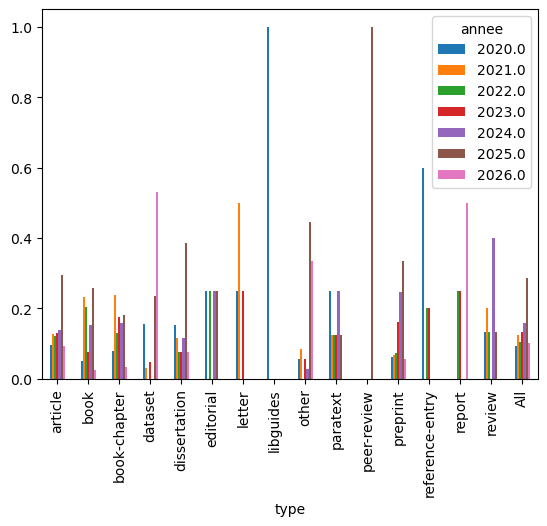

In [ ]:
# On peut aussi faire un graph sur le
tab.plot(
    kind="bar",
    # stacked=True,
    # legend=False,
    # subplots=True,
);

### Manipuler plusieurs tableaux

In [ ]:
distribution_absolue = my_df["annee"].value_counts().sort_index().tail(20)
distribution_pourcentage = (
    round(100 * my_df["annee"].value_counts(normalize=True), 1).sort_index().tail(20)
)

Réunion de deux tableaux ensemble

In [75]:
# pd.concat([tableau_1, tableau_2], axis=1)
# pd.concat…………

In [ ]:
# Pimper les noms de colonnes avec un dictionnaire :
pd.concat(
    {"%": distribution_pourcentage, "F": distribution_absolue}, axis=1
)  # .tail(10)

,%,F
annee,,
2007.0,0.2,5
2008.0,0.4,9
2009.0,0.4,9
2010.0,0.8,18
2011.0,1.5,31
2012.0,1.3,27
2013.0,3.1,66
2014.0,3.2,68
2015.0,3.1,66


## 4. Recodages et modification de variables

- renomer des modalités
- valeurs nulles
- fonctions comme .cut
- solution générique de .apply

### Créer des nouvelles variables (~ Ajout de nouvelles colonnes)

Lorsque vous recodez des variables, vous pouvez ajouter une nouvelle variable au jeu de données d'origine afin de conserver la version originale de votre variable.

![](https://pandas.pydata.org/docs/_images/05_newcolumn_1.svg)




In [81]:
my_df["my_new_var"] = 0
my_df

,type,titre,annee,score,resume,my_new_var
0,article,Computational Social Science,2009.0,1360.357700,A field is emerging that leverages the capacit...,0
1,article,Manifesto of computational social science,2012.0,497.826660,NaN,0
2,article,Computational social science: Obstacles and op...,2020.0,438.539860,"Data sharing, research ethics, and incentives ...",0
3,article,Computational Social Science and Sociology,2020.0,413.034240,The integration of social science with compute...,0
4,article,Integrating explanation and prediction in comp...,2021.0,408.089800,NaN,0
...,...,...,...,...,...,...
2124,article,Complexity at large,2011.0,0.095437,The following news item is taken in part from ...,0
2125,article,AI-Driven Behavioral and Sociocultural Analysi...,2025.0,0.087923,Author: Khan Tahsin AbrarAffiliation: Independ...,0
2126,paratext,Index,2020.0,0.067887,"Citation (2020), ""Index"", Härtel, C.E.J., Zerb...",0
2127,book-chapter,Publishing academic books in emerging fields: ...,2024.0,0.046431,Publishing academic books in emerging fields p...,0


In [82]:
# On peut également supprimer une colonne à l'aide de la méthode drop.
# Voyons à quoi ressemble le recoded_df si nous supprimons/dropons la variable.
my_df.drop("my_new_var", axis=1)

# nb: axis=1 indique que nous voulons supprimer une colonne(=1), et pas une ligne(=0)

,type,titre,annee,score,resume
0,article,Computational Social Science,2009.0,1360.357700,A field is emerging that leverages the capacit...
1,article,Manifesto of computational social science,2012.0,497.826660,NaN
2,article,Computational social science: Obstacles and op...,2020.0,438.539860,"Data sharing, research ethics, and incentives ..."
3,article,Computational Social Science and Sociology,2020.0,413.034240,The integration of social science with compute...
4,article,Integrating explanation and prediction in comp...,2021.0,408.089800,NaN
...,...,...,...,...,...
2124,article,Complexity at large,2011.0,0.095437,The following news item is taken in part from ...
2125,article,AI-Driven Behavioral and Sociocultural Analysi...,2025.0,0.087923,Author: Khan Tahsin AbrarAffiliation: Independ...
2126,paratext,Index,2020.0,0.067887,"Citation (2020), ""Index"", Härtel, C.E.J., Zerb..."
2127,book-chapter,Publishing academic books in emerging fields: ...,2024.0,0.046431,Publishing academic books in emerging fields p...


In [ ]:
# Une fois satisfaits du résultat, on "sauvegarde"
my_df = my_df.drop("my_new_var", axis=1)
my_df

,type,titre,annee,score,resume
0,article,Computational Social Science,2009.0,1360.357700,A field is emerging that leverages the capacit...
1,article,Manifesto of computational social science,2012.0,497.826660,NaN
2,article,Computational social science: Obstacles and op...,2020.0,438.539860,"Data sharing, research ethics, and incentives ..."
3,article,Computational Social Science and Sociology,2020.0,413.034240,The integration of social science with compute...
4,article,Integrating explanation and prediction in comp...,2021.0,408.089800,NaN
...,...,...,...,...,...
2124,article,Complexity at large,2011.0,0.095437,The following news item is taken in part from ...
2125,article,AI-Driven Behavioral and Sociocultural Analysi...,2025.0,0.087923,Author: Khan Tahsin AbrarAffiliation: Independ...
2126,paratext,Index,2020.0,0.067887,"Citation (2020), ""Index"", Härtel, C.E.J., Zerb..."
2127,book-chapter,Publishing academic books in emerging fields: ...,2024.0,0.046431,Publishing academic books in emerging fields p...


### Recodage des variables avec la méthode `.replace()`

On peut utiliser la méthode/fonction `replace` pour faciliter le recodage des variables.

In [87]:
# Essayons de recoder la variable type
# remplaçons "book-chapter" par chapitre
my_df["type"].replace("book-chapter", "chapitre")

0        article
1        article
2        article
3        article
4        article
          ...   
2124     article
2125     article
2126    paratext
2127    chapitre
2128    paratext
Name: type, Length: 2129, dtype: object

In [ ]:
# Faire la même chose pour toutes les valeurs …
# Hell no

Recoder chaque catégorie une par une est **TRÈS** fastidieux ! Mais il y a des solutions.

On peut utiliser la méthode `.replace()` avec des listes ou un dictionnaire !

In [89]:
list(df["type"].unique())

['article',
 'review',
 'book',
 'preprint',
 'book-chapter',
 'paratext',
 'dissertation',
 'reference-entry',
 'report',
 'letter',
 'editorial',
 'other',
 'dataset',
 'libguides',
 'peer-review']

In [95]:
# Créer deux listes avec les anciennes et les nouvelles modalités
# ATTENTION, l'ordre des éléments des listes est important!!
old_labels = ["book", "book-chapter", "report", "editorial"]
new_labels = ["livre", "chapitre", "rapport", "edito"]

In [96]:
# Passer à la fonction replace les anciennes et les nouvelles valeurs
my_df["type"].replace(old_labels, new_labels)

0        article
1        article
2        article
3        article
4        article
          ...   
2124     article
2125     article
2126    paratext
2127    chapitre
2128    paratext
Name: type, Length: 2129, dtype: object

In [100]:
#my_df["type"].replace(old_labels, new_labels).value_counts()

In [ ]:
# Je peux donc aussi plutôt utiliser un dictionnaire pour faire le recodage
recode_dict = {
    "book": "livre",
    "book-chapter": "chapitre",
    "report": "rapport",
    # etc.
}

# Et voir ce que ça donne :
my_df["type"].replace(recode_dict).value_counts()

type
article            1126
preprint            371
chapitre            275
livre                78
dataset              71
other                59
dissertation         57
paratext             25
review               23
reference-entry      13
editorial             9
libguides             9
rapport               6
letter                5
peer-review           2
Name: count, dtype: int64

In [98]:
# quand je suis satisfait, je "sauve" dans une nouvelle variable ou j'écrase l'ancienne
my_df["type_recod"] = my_df["type"].replace(recode_dict)

### La méthode `.cut()` (dicrétiser des variables quanti)

La méthode/fonction `pd.cut()` nous permet de transformer une variable continue en catégories !

In [49]:
df.isnull().sum()

id                           0
type                         0
primary_location             0
title                        1
abstract_inverted_index    438
publication_year             9
publication_date             9
open_access                  0
relevance_score              0
abstract                   438
journal                    546
dtype: int64

In [ ]:
# pd.qcut(df["CITED_BY_COUNT"], q=10, duplicates="drop").value_counts()

On veut recoder les publications en trois catégories :
- 0 ou 1 citations
- moins de 10 citations
- et plus de 10 citations

In [ ]:
df["CITED_INT"] = pd.cut(
    df["CITED_BY_COUNT"], [-1, 1, 10, 10000], labels=["<2", "2-10", "+10"]
)

In [ ]:
df.groupby("CITED_INT")["PUBLICATION_YEAR"].mean()

CITED_INT
<2      2017.494876
2-10    2015.906986
+10     2012.704863
Name: PUBLICATION_YEAR, dtype: float64

## Autres

In [65]:
# exporter en csv

# ICI CRÉER UN EXO AVEC CETTE IDÉE
+ STAT DESC
+ VISU ?

## Objectif

- tous les articles
- qui parlent vraiemnt de sciences sociales computationnelles
- taille de l'abstract

In [66]:
len("blabla")

6

In [68]:
df["abstract"]

0       A field is emerging that leverages the capacit...
1                                                     NaN
2       Data sharing, research ethics, and incentives ...
3       The integration of social science with compute...
4                                                     NaN
                              ...                        
2119    The following news item is taken in part from ...
2120    Author: Khan Tahsin AbrarAffiliation: Independ...
2121    Citation (2020), "Index", Härtel, C.E.J., Zerb...
2122    Publishing academic books in emerging fields p...
2123    Citation (2023), "Index", Lytras, M.D., Housaw...
Name: abstract, Length: 2124, dtype: object

In [ ]:
def compter(texte):
    if pd.isnull(texte):
        return 0
    else:
        return len(texte)


# Créer une nouvelle variable pour la taille de l'abstract
# Utilisez .apply

In [ ]:
df["LEN_ABSTRACT"].describe()

count     9278.000000
mean      2161.624811
std       5606.592746
min          0.000000
25%          0.000000
50%          0.000000
75%       1495.000000
max      43111.000000
Name: LEN_ABSTRACT, dtype: float64

In [ ]:
df["CSS"] = (
    df["ABSTRACT"]
    .str.lower()
    .str.contains("computational social science")
    .fillna(False)
)